## Network inference from glycoproteomics data reveals new reactions in the IgG glycosylation pathway.
## https://www.ncbi.nlm.nih.gov/pubmed/29133956

In [1]:
import sys
# please insert the glycompare to the PATH
sys.path.insert(0, '/Users/apple/PycharmProjects/GlyCompare/')
import pandas as pd
import glycompare
import glypy


Thanks for using the GlyCompare v1.1, 
Please check our github for the latest update.


Bokan & Ben,
10/1/2019




In [2]:
k_2013 = pd.read_csv('/Users/apple/Desktop/NathanLab/glycan_data/Korčula2013.txt', header=0, sep='\t', index_col=0)
k_2010 = pd.read_csv('/Users/apple/Desktop/NathanLab/glycan_data/Korčula2010.txt', header=0, sep='\t', index_col=0)
split = pd.read_csv('/Users/apple/Desktop/NathanLab/glycan_data/Split.txt', header=0, sep='\t', index_col=0)
vis = pd.read_csv('/Users/apple/Desktop/NathanLab/glycan_data/Vis.txt', header=0, sep='\t', index_col=0)

In [3]:
a = set([i.split('_')[1] for i in set(list(k_2013.columns)+list(k_2010.columns)+list(split)+list(vis))])
a

{'G0',
 'G0F',
 'G0FN',
 'G0N',
 'G1',
 'G1F',
 'G1FN',
 'G1FNS',
 'G1FS',
 'G1N',
 'G1NS',
 'G1S',
 'G2',
 'G2F',
 'G2FN',
 'G2FNS',
 'G2FS',
 'G2N',
 'G2NS',
 'G2S'}

In [4]:
from glycompare import glycan_io
# glytoucan_db = glycan_io.load_glytoucan_database('/Users/apple/PycharmProjects/GlyCompare/glycompare/database/glytoucan_database.json')

adding G88876JQ
adding G65984FE
adding G44754DF
adding G29024OJ
adding G66741YQ
adding G00998NI


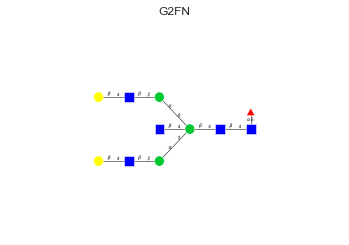

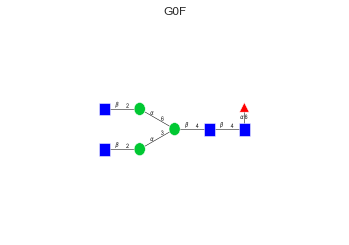

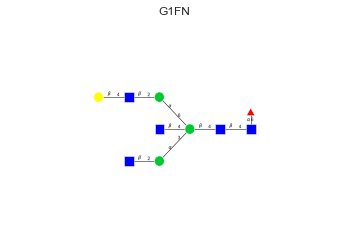

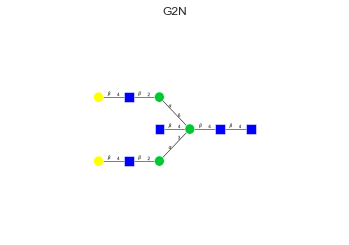

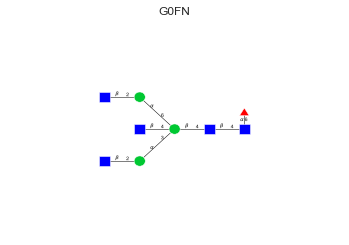

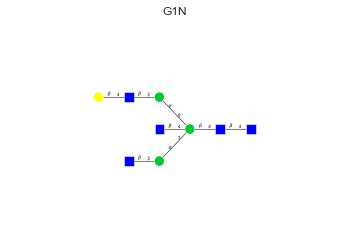

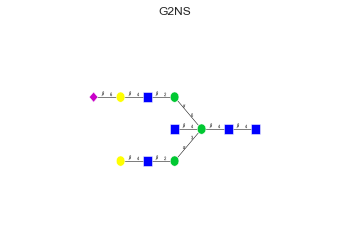

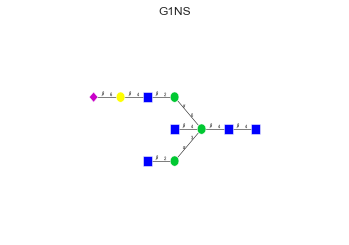

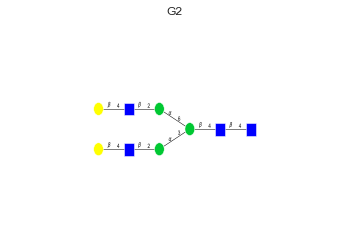

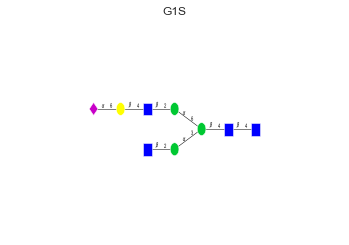

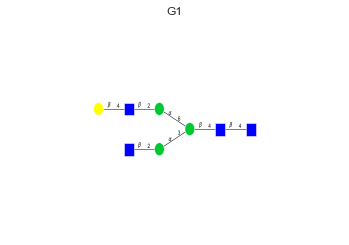

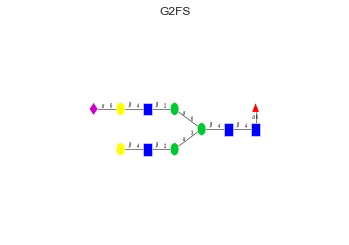

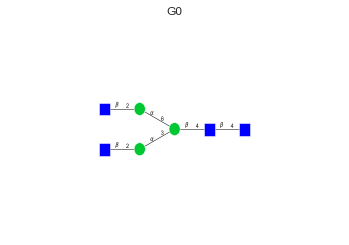

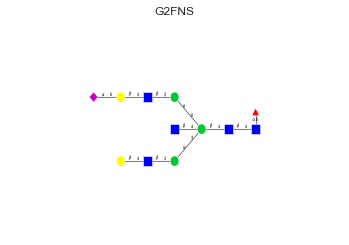

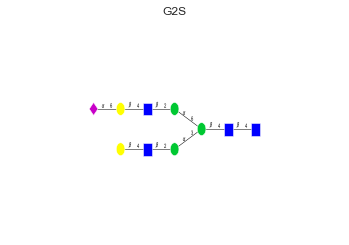

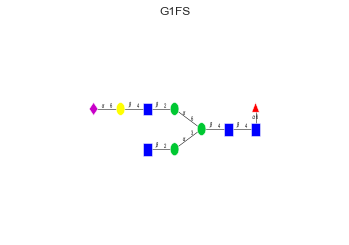

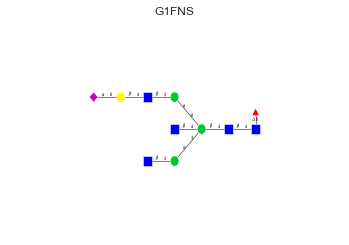

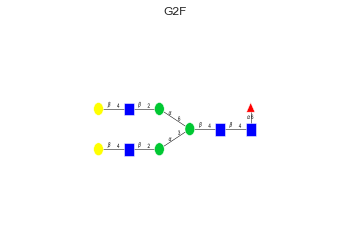

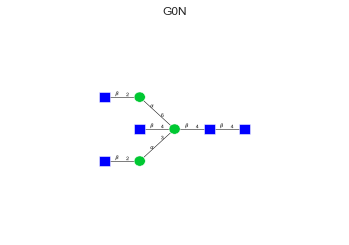

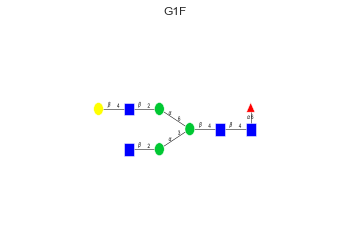

In [31]:
from importlib import reload
reload(glycan_io)
glycan_match = {'G0':'G88876JQ',
'G0F':'G65984FE',
'G0FN':1,
'G0N':1,
'G1':'G44754DF',
'G1F':'G29024OJ',
'G1FN':1,
'G1FNS':1,
'G1FS':1,
'G1N':1,
'G1NS':1,
'G1S':1,
'G2':'G66741YQ',
'G2F':'G00998NI',
'G2FN':1,
'G2FNS':1,
'G2FS':1,
'G2N':1,
'G2NS':1,
'G2S':1}
a_glycan = glycan_io.load_glycan_obj_from_glycoct_file('/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/glycoct/')
for i in glycan_match:
    if glycan_match[i]!=1:
        a_glycan[i] = glycan_io.load_glycan_obj_from_glytoucan(glycan_match[i])
glycompare.glycan_io.output_glycan_dict_to_glycoct_dict(a_glycan,'/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/glycan_glycoct_dict.json', )
for i in a_glycan:
    glycompare.plot_glycan_utilities.plot_glycan(a_glycan[i], title=i, label=True, addr='/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/'+i+'.eps')

In [8]:
group_1 = []
group_2 = []
group_4 = []
group_id_1 = []
group_id_2 = []
group_id_4 = []

for i in k_2013.columns:
    x,y = i.split('_')
    if i.find('IgG1') != -1:
        group_id_1.append(i)
        group_1.append(y)
    elif i.find('IgG2') != -1:
        group_id_2.append(i)
        group_2.append(y)
    elif i.find('IgG4') != -1:
        group_id_4.append(i)
        group_4.append(y)
    else:
        print(i)


In [9]:
table_list=[]
output_name_ = []
data_name_list = ['k_2010', 'k_2013', 'split', 'vis']
ig_name_list = ['group_1', 'group_2', 'group_4']
ig_table_list = [group_1, group_2, group_4]

for idex, i in enumerate([k_2010, k_2013, split, vis]):
    for jdex, j in enumerate([group_id_1, group_id_2, group_id_4]):
        _table = i[j]
        
        _table.columns = [k.split('_')[1] for k in _table[j].columns]
        table_list.append(_table)

        output_name_.append(data_name_list[idex]+'_'+ig_name_list[jdex])


In [10]:
for idex, i in enumerate(table_list):
    i.to_csv('/Users/apple/Desktop/NathanLab/glycan_data/'+output_name_[idex]+'.csv')

In [12]:
import os
from importlib import reload

import pandas as pd
import seaborn as sns
from scipy.stats import zscore

from glycompare import *
import matplotlib.pyplot as plt
from copy import deepcopy
# reload(pipeline_functions)
%matplotlib inline

In [13]:
# parameter setting 
# environment parameter setting 
glycompare_addr = '/Users/apple/PycharmProjects/GlyCompare/'
# glytoucan_db_addr = os.path.join(glycompare_addr, 'glycompare','database', 'glytoucan_database.json')
# __init__.num_processors = 4
# __init__.exact_Ture = False
linkage_specific = True
num_processors = 8
# project parameter
working_addr = '/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/'
project_name = "be2017"
costumized_glycan_identifier = False
external_profile_naming= False
reload(pipeline_functions)

# initiator
keywords_dict = pipeline_functions.load_para_keywords(project_name, working_addr, )
keywords_dict

{'project_name': 'be2017',
 'working_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/',
 'glycoct_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/glycoct/',
 'source_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/source_data/',
 'output_data_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/output_data/',
 'plot_output_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/output_plot/',
 'glycan_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/output_data/be2017_glycan_glycoct_dict.json',
 'glycan_substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/output_data/be2017_glycan_substructure_glycoct_dict.json',
 'substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/output_data/be2017_substructure_glycoct_dict.json',
 'substructure_glycoct_vec_addr': '/Users/apple/PycharmProjects/GlyCompare/

Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory
Saved /Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/output_data/be2017_glycan_glycoct_dict.json for future use. You can use "used" in the datatype next time
start parallel parsing 20 glycans
start G2FN
start G2N
start G1FN
start G0F
start G0FN
start G2NS
start G1N
start G1NS
G0F 8 0.28429102897644043
start G2
G1N 9 0.5269801616668701
start G1S
G0FN 9 0.5737581253051758
start G1
G2 9 0.42406606674194336
start G2FS
G1 8 0.19974493980407715
start G0
G1FN 10 0.9177021980285645
start G2FNS
G2N 10 1.2064571380615234
G0 7 0.40892887115478516
start G2S
start G1FS
G1NS 10 1.2597627639770508
start G1FNS
G1S 9 0.7075479030609131
start G2F
G2FN 11 1.4732649326324463
start G0N
G2NS 11 1.5478992462158203
start G1F
G1F 9 0.42304396629333496
G2S 10 0.8060259819030762
G2FS 11 1.361292839050293
G1FS 10 0.8544309

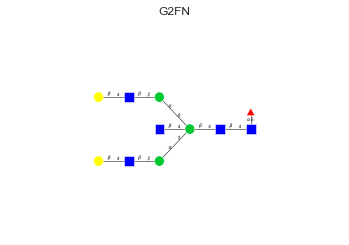

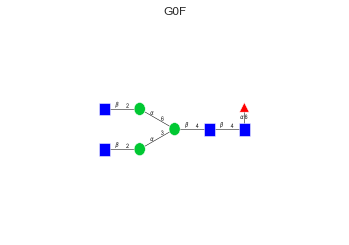

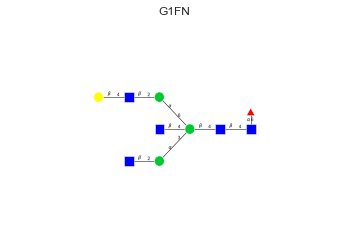

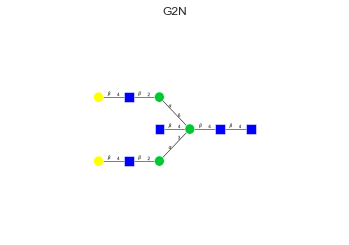

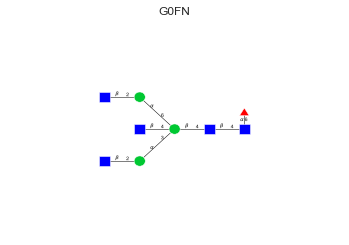

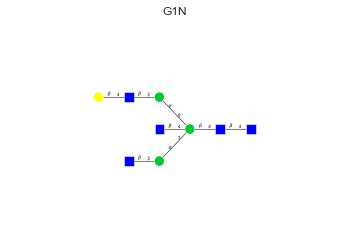

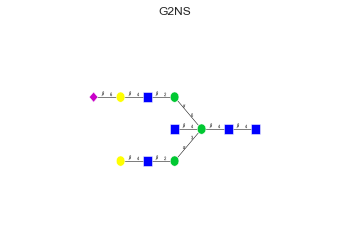

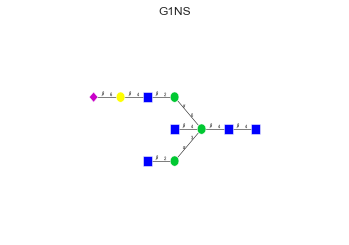

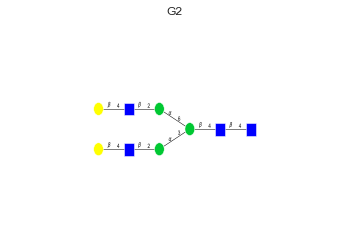

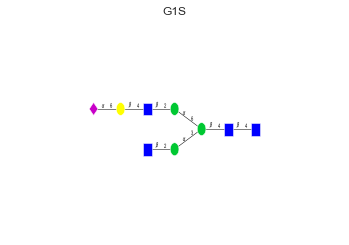

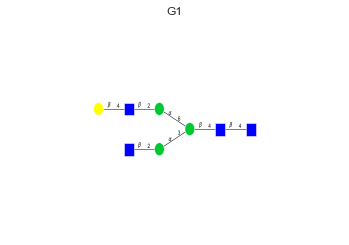

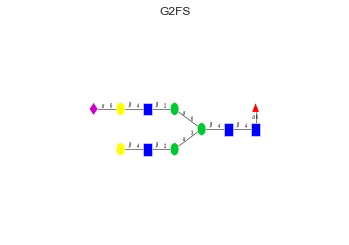

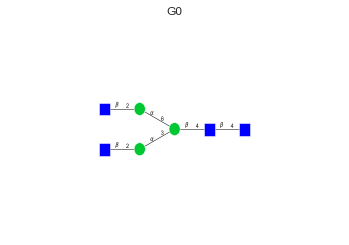

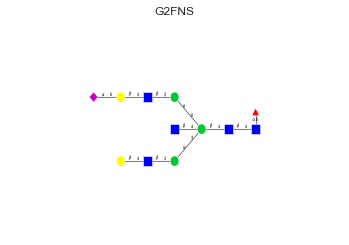

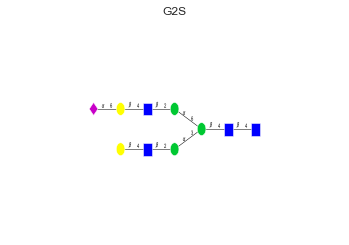

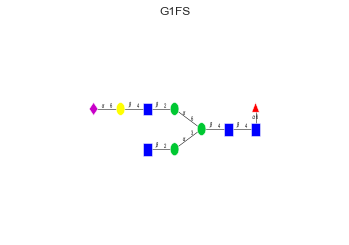

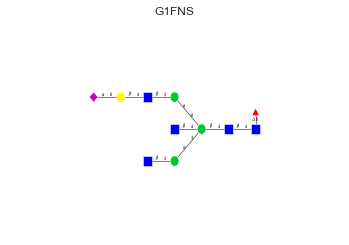

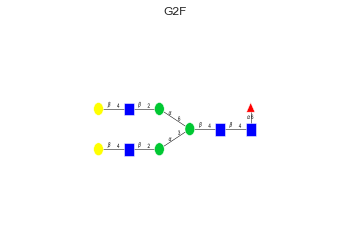

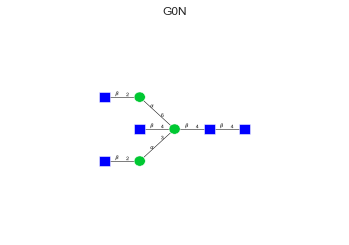

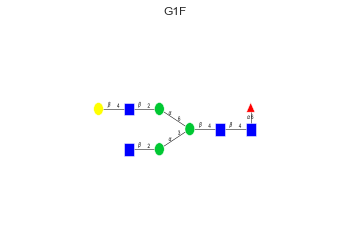

In [36]:
# pipeline_functions.check_init_dir(keywords_dict)
reload(glycan_io)
reload(pipeline_functions)

data_name_ = ['k_2010_group_1.csv','k_2010_group_2.csv','k_2010_group_4.csv']
meta_name = []
for i in data_name_:
    _ = pd.read_csv(os.path.join(working_addr,'source_data',i), sep=',', index_col=0)
    meta_name.extend(list(_.columns))
meta_name = set(meta_name)
# structure_loader = list(meta_name)
glycan_dict = glycan_io.load_glycan_dict_from_json('/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/glycan_glycoct_dict.json')

data_type = 'glycan_dict'
glycan_dict = pipeline_functions.load_glycans_pip(keywords_dict=keywords_dict,
                                           data_type=data_type, 
                                           structure_loader=glycan_dict)

for i in glycan_dict:
    plot_glycan_utilities.plot_glycan(glycan_dict[i], label=True, title=i)

In [39]:
reload(pipeline_functions)
reload(merge_substructure_vec)
glycan_substructure_occurance_dict = pipeline_functions.extract_and_merge_substrutures_pip(keywords_dict, 
                                                                     num_processors=num_processors,
                                                                     linkage_specific=linkage_specific, 
                                                                     forced=True)

start glycan_substructure_dict
loaded existed substructure_dic
start merge substructure_dict
Start merge_glycan_substructure_to_substructure_dict
combine original
substructure_dict is merged with len  1856
finished removing duplicate
after the cleaning the substructure vec's length is 202
1 7
2 10
3 13
4 18
5 24
6 30
7 32
8 29
9 21
10 12
11 5
12 1
202
finished merge substructure_dic
1 7
2 10
3 13
4 18
5 24
6 30
7 32
8 29
9 21
10 12
11 5
12 1
202
get substructure vec, the length is  202
start processing G2FN
start processing G0F
start processing G1FN
start processing G2N
start processing G0FN
start processing G1N
start processing G2NS
start processing G1NS
start processing G2
start processing G1S
start processing G1
start processing G2FS
start processing G0
start processing G2FNS
start processing G2S
start processing G1FS
start processing G1FNS
start processing G2F
start processing G0N
start processing G1F
closing poll
joining pool
finished  1
finished  3
finished  2
finished  0
finishe

the glycan core is
start substructure_with core
len 7
len 8
len 9
len 10
len 11
len 12
Finish the n-glycan match  28  substructures are matched to the n-glycan core
start building dependence_tree
7
8
9
10
11
12


({108: [135, 139, 148, 154],
  135: [164, 167, 174],
  139: [164, 165, 172, 173, 176],
  148: [167, 173, 182],
  154: [174, 176, 182],
  164: [184, 186, 187, 189],
  165: [184, 190, 194],
  167: [187, 192],
  172: [186, 188],
  173: [187, 188, 194, 195],
  174: [189, 192],
  176: [189, 190, 195],
  182: [192, 195],
  184: [197, 198],
  186: [196],
  187: [196, 198, 199],
  188: [196],
  189: [197, 199],
  190: [197, 200],
  192: [199],
  194: [198, 200],
  195: [199, 200],
  196: [],
  197: [201],
  198: [201],
  199: [201],
  200: [201],
  201: []},
 [(108, 135),
  (108, 139),
  (108, 148),
  (108, 154),
  (135, 164),
  (139, 164),
  (139, 165),
  (135, 167),
  (148, 167),
  (139, 172),
  (139, 173),
  (148, 173),
  (135, 174),
  (154, 174),
  (139, 176),
  (154, 176),
  (148, 182),
  (154, 182),
  (164, 184),
  (165, 184),
  (164, 186),
  (172, 186),
  (164, 187),
  (167, 187),
  (173, 187),
  (172, 188),
  (173, 188),
  (164, 189),
  (174, 189),
  (176, 189),
  (165, 190),
  (176, 1

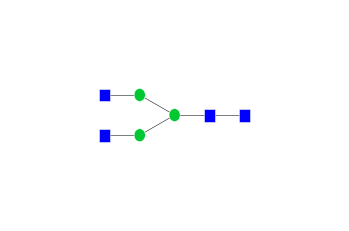

In [91]:
substructure_glycoct_dict_addr = keywords_dict['substructure_glycoct_dict_addr']

substructure_dict = glycan_io.load_substructure_vec_from_json(substructure_glycoct_dict_addr)
_substructure_lab = select_motifs.substructureLabwithCore(substructure_=substructure_dict,
                                                    glycan_core=substructure_dict[108],
                                                    linkage_specific=linkage_specific)  # unicarbkb_substructures_12259.json

_substructure_lab.get_dependence_tree_core()

In [92]:
# data_name = 'k_2010_group_1.csv'
data_name = ['k_2010_group_1.csv','k_2010_group_2.csv','k_2010_group_4.csv']
# data_name = ['k_2010_group_1.csv','k_2010_group_2.csv','k_2010_group_4.csv']

abd_table = glycan_io.load_table(os.path.join(keywords_dict['source_dir'], 'k_2010_group_1.csv'))
abd_table = abd_table.transpose()
_, glycoprofile_list = pipeline_functions.glycoprofile_pip(keywords_dict, 
                                                           abd_table, 
                                                           unique_glycan_identifier_to_structure_id=True, 
                                                           already_glytoucan_id=True,
                                                           external_profile_naming=False, 
                                                           forced=True)

abd_list 20 profile_list 504
20 504
no external profile naming found


In [93]:
keywords_dict['plot_output_dir']

'/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/output_plot/'

the glycan core is
start substructure_with core
len 7
len 8
len 9
len 10
len 11
len 12
Finish the n-glycan match  28  substructures are matched to the n-glycan core
start building dependence_tree
7
8
9
10
11
12
Start dropping nodes with weight zero, nodes count: 28
Nodes left []
28 60
_a.nodes 28
_a.nodes 28
merged_weights_dict 28
After first drop 8 + 20 =  28 28.0
mod_nodes 20
mod_edges 36
_substructure_lab.core_index 108


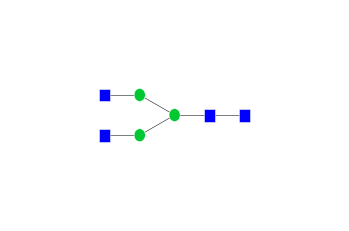

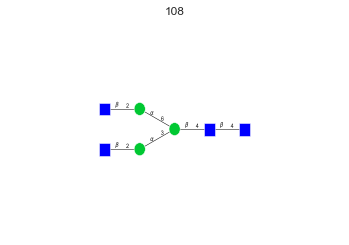

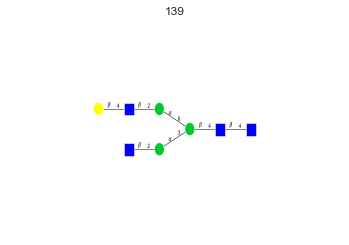

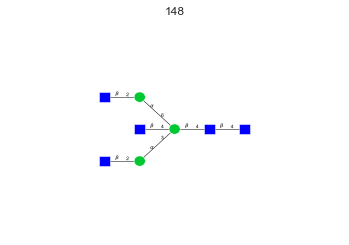

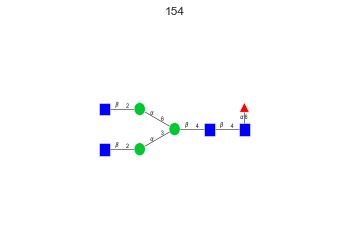

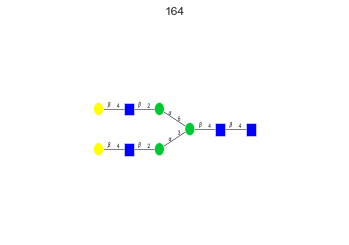

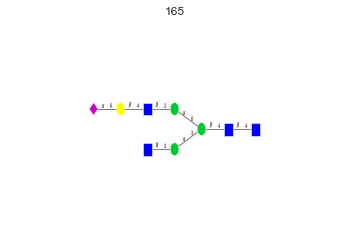

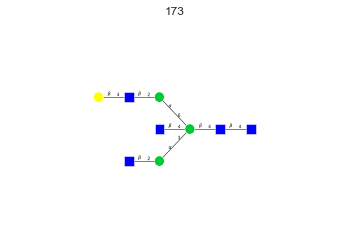

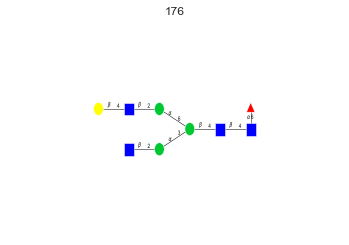

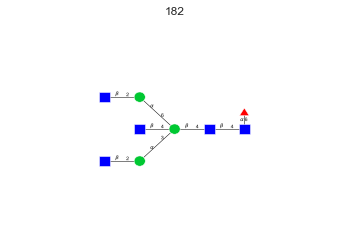

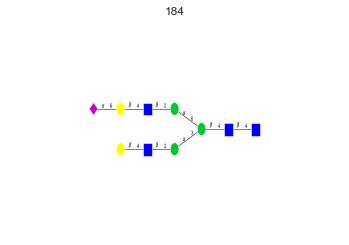

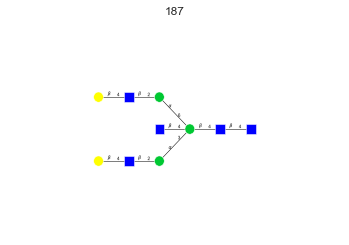

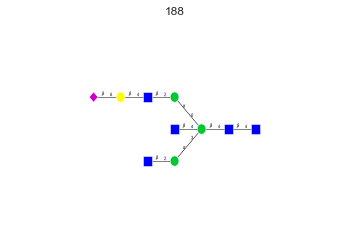

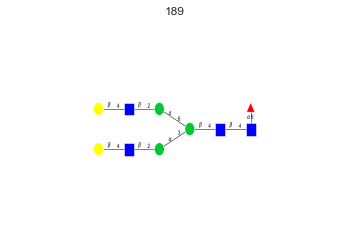

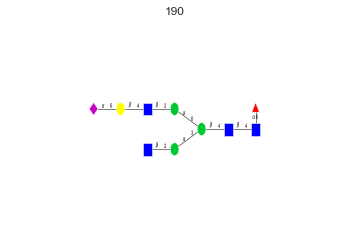

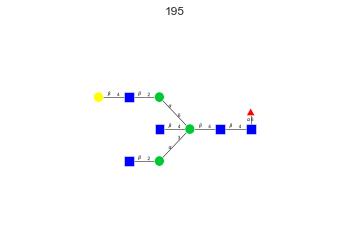

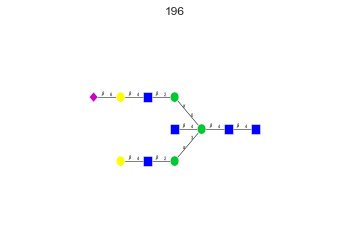

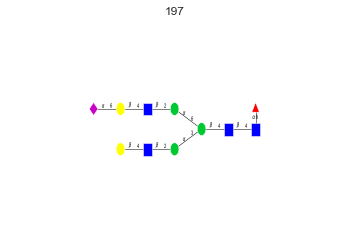

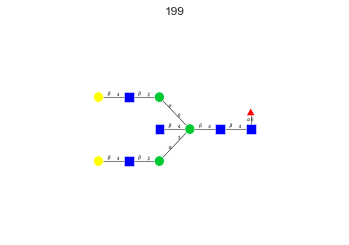

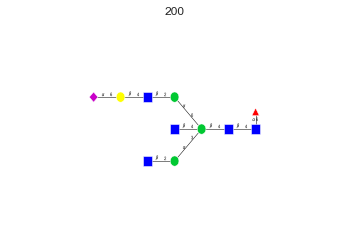

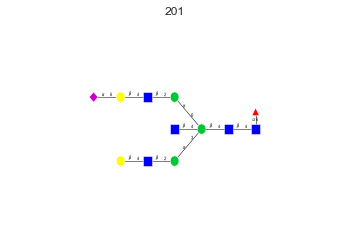

In [95]:
reload(pipeline_functions)
core = substructure_dict[108]
substructure_glycoct_dict_addr = keywords_dict['substructure_glycoct_dict_addr']
# assert os.path.isfile(substructure_glycoct_dict_addr), 'missing ' + substructure_glycoct_dict_addr
substructure_abd_table_addr = keywords_dict['substructure_abd_table_addr']
substructure_abd_table = pd.read_csv(substructure_abd_table_addr, index_col=0)
substructure_dict = glycan_io.load_substructure_vec_from_json(substructure_glycoct_dict_addr)
# _substructure_lab = select_substructures.substructureLabwithCore(substructure_dict, glycan_core=select_substructures.nglycan_core, linkage_specific=False)  # unicarbkb_substructures_12259.json
# _substructure_lab.get_dependence_tree_core()

# if not select_col:
select_col = substructure_abd_table.columns
_substructure_lab = select_motifs.substructureLabwithCore(substructure_=substructure_dict,
                                                    glycan_core=core,
                                                    linkage_specific=linkage_specific)  # unicarbkb_substructures_12259.json
_substructure_lab.get_dependence_tree_core()
a_node_state = select_motifs.NodesState(dependence_tree=_substructure_lab.substructure_dep_tree_core,
                                                substructure_weight=select_motifs.get_weight_dict(
                                                    substructure_abd_table[select_col]),
                                                linkage_specific=linkage_specific)
node_attri, edge_attri, mod_nodes, mod_edges, merged_weights_dict = a_node_state.nodes_dropping_pipe(
drop_parellel=False, drop_diff_abund=False)
print('_substructure_lab.core_index',_substructure_lab.core_index)
# if _substructure_lab.core_index in mod_nodes:
#         mod_nodes.remove(_substructure_lab.core_index)
#         print("Removed core, the index is", _substructure_lab.core_index)
motif_dict = {}
for i in mod_nodes:
    motif_dict[i] = _substructure_lab.substructure_vec[i]
glycan_io.output_glycan_dict_to_glycoct_dict(motif_dict, keywords_dict['motif_glycoct_dict_addr'])

motif_abd_table = substructure_abd_table[select_col][substructure_abd_table.index.isin(mod_nodes)]
motif_abd_table_addr = keywords_dict['motif_abd_table_addr']
motif_abd_table.to_csv(motif_abd_table_addr)
for i in mod_nodes:
    plot_glycan_utilities.plot_glycan(_substructure_lab.substructure_vec[i], 
                                      title=i, 
                                      label=True,
                                      addr=keywords_dict['plot_output_dir'] + 'motif_'+str(i)+'.eps')
#     plt.savefig()
#     print(keywords_dict['plot_output_dir'] + 'motif_'+str(i)+'.eps')

In [88]:
index_list = sorted(list(node_attri.keys()))
keep_list = [node_attri[i]['kept'] for i in index_list]
from glypy.algorithms.subtree_search.inclusion import subtree_of

motif_glycan_mapping = []
for i in index_list:
    if i in mod_nodes: 
        found=False
        for j in glycan_dict:
            if subtree_of(_substructure_lab.substructure_vec[i], glycan_dict[j], exact=True) ==1 \
                and subtree_of(glycan_dict[j], _substructure_lab.substructure_vec[i],  exact=True) ==1:
                print(i,j, found)
                found=True
                break
        if found:
            motif_glycan_mapping.append(j)
        else:
            motif_glycan_mapping.apend('N')
        
    else:
        motif_glycan_mapping.append('N')
# motif_glycan_mapping
pd.DataFrame(data={'index':index_list, 'keep':keep_list, 'if_glycan':motif_glycan_mapping}).to_csv('/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/output_data/node_list.csv')

139 G1 False
148 G0N False
154 G0F False
164 G2 False
165 G1S False
173 G1N False
176 G1F False
182 G0FN False
184 G2S False
187 G2N False
188 G1NS False
189 G2F False
190 G1FS False
195 G1FN False
196 G2NS False
197 G2FS False
199 G2FN False
200 G1FNS False
201 G2FNS False


In [89]:
def _parse_edge_attri_to_table(edge_dict):
#     edge_start=[]
#     edge_end = []
    edge_attri_dict = {'start':[], 'end':[]}
    _attributes_checked = False
    for _nodes in edge_dict:
        for _sub_nodes in edge_dict[_nodes]:
            if not _attributes_checked:
                for _key in edge_dict[_nodes][_sub_nodes]:
                    edge_attri_dict[_key] = []
                _attributes_checked=True
            for _key in edge_dict[_nodes][_sub_nodes]:
#                 print(_nodes, _sub_nodes, edge_dict[_nodes][_sub_nodes][_key])
                edge_attri_dict[_key].append(edge_dict[_nodes][_sub_nodes][_key])
            edge_attri_dict['start'].append(_nodes)
            edge_attri_dict['end'].append(_sub_nodes)
    return edge_attri_dict
pd.DataFrame(_parse_edge_attri_to_table(edge_attri)).to_csv('/Users/apple/PycharmProjects/GlyCompare/example_data/BE2017/output_data/edge_list.csv')

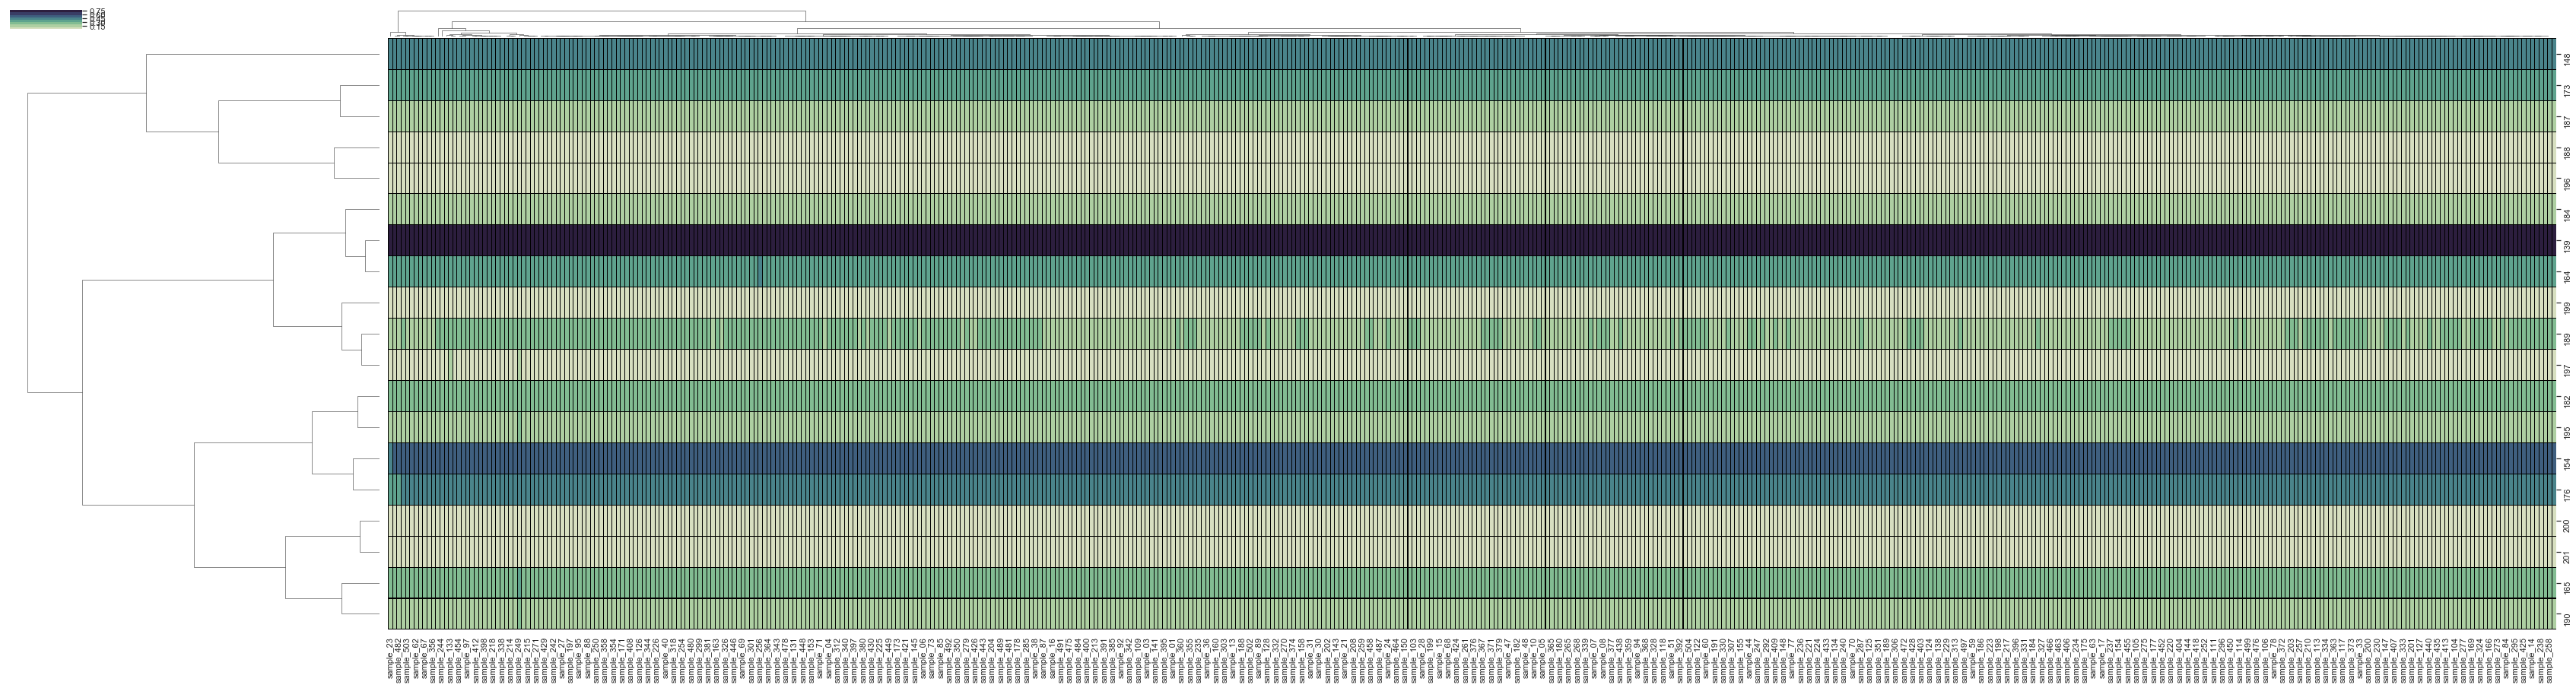

In [90]:
# keywords_dict['abundance_table.csv'] = 
# glycoprofile_cluster_dict, glyco_motif_cluster_dict = pipeline_functions.clustering_analysis_pip(keywords_dict=keywords_dict, 
#                                            motif_abd_table=motif_abd_table, )
# glycoprofile_cluster_dict, glyco_motif_cluster_dict = pipeline_functions.clustering_analysis_pip(keywords_dict=keywords_dict, 
#                                            motif_abd_table=motif_abd_table, 
#                                            select_profile_name = selected_name_list)
selected_name_list = motif_abd_table.columns.tolist()

    # df_ncore=pd.DataFrame(data=preprocessing.scale(df_ncore.transpose()).transpose(), index=df_ncore.index, columns=df_ncore.columns)
    # motif_abd_table.to_csv(os.path.join(keywords_dict['intermediate_dir'],
    #                                     str(len(selected_name_list)) + r"selected_abundance_matrix.txt"))
    # motif_abd_table.colmuns = selected_name_list

    # plt.savefig(keywords_dict['plot_output_dir'] + 'pseudo_profile_clustering.svg')
# motif_abd_table.drop()
cluster_grid = clustering_analysis.draw_glycan_clustermap(motif_abd_table=motif_abd_table,
                                                              address=keywords_dict[
                                                                          'plot_output_dir'] + 'pseudo_profile_clustering.eps',
                                                              metric="correlation",
                                                              cmap=sns.cubehelix_palette(8, start=.5, rot=-.75),
                                                              linewidths=0.01,
                                                              figsize=(60,15),
                                                              linecolor='black',
                                                              method='complete')

In [64]:
motif_abd_table.shape

(21, 504)